In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('personal_health_data.csv')
data2 = pd.read_csv('digital_interaction_data.csv')
data3 = pd.read_csv('activity_environment_data.csv')

In [5]:
merge_dt = pd.merge(data1, data2, on='User_ID', how='left')

In [6]:
final_dt = pd.merge(merge_dt, data3, on='User_ID', how='left')

In [7]:
final_dt.head()

,User_ID,Age,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Timestamp_x,...,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,Altitude,UV_Exposure
0,U_00001,61,Other,88.677623,178.524231,Diabetes,No,No,Moderate,2021-01-01 00:00:00,...,9146,457.30,7.3168,Running,1.219675,Low,27.271525,97.338777,1739.690662,4.069132
1,U_00002,24,Male,86.742084,200.346358,NaN,Yes,No,Moderate,2021-01-01 01:00:00,...,9362,468.10,7.4896,Yoga,1.378399,Moderate,24.430288,66.573240,4102.042824,1.723672
2,U_00003,81,Other,61.656054,195.971356,Hypertension,Yes,No,Moderate,2021-01-01 02:00:00,...,21,1.05,0.0168,Strength Training,0.803857,Moderate,29.340574,30.138828,1794.899935,0.135647
3,U_00004,70,Other,141.513794,164.178216,Hypertension,No,No,Heavy,2021-01-01 03:00:00,...,13252,662.60,10.6016,NaN,0.000000,NaN,25.289230,78.838640,4025.840921,4.408343
4,U_00005,30,Other,80.552872,146.920675,Diabetes,Yes,Yes,Heavy,2021-01-01 04:00:00,...,21,1.05,0.0168,Yoga,0.807389,High,21.853590,17.673261,3422.381447,2.820739


In [8]:
final_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 10000 non-null  object 
 1   Age                     10000 non-null  int64  
 2   Gender                  10000 non-null  object 
 3   Weight                  10000 non-null  float64
 4   Height                  10000 non-null  float64
 5   Medical_Conditions      6696 non-null   object 
 6   Medication              10000 non-null  object 
 7   Smoker                  10000 non-null  object 
 8   Alcohol_Consumption     6640 non-null   object 
 9   Timestamp_x             10000 non-null  object 
 10  Day_of_Week             10000 non-null  object 
 11  Sleep_Duration          10000 non-null  float64
 12  Deep_Sleep_Duration     10000 non-null  float64
 13  REM_Sleep_Duration      10000 non-null  float64
 14  Wakeups                 10000 non-null 

In [9]:
final_dt.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Weight                       0
Height                       0
Medical_Conditions        3304
Medication                   0
Smoker                       0
Alcohol_Consumption       3360
Timestamp_x                  0
Day_of_Week                  0
Sleep_Duration               0
Deep_Sleep_Duration          0
REM_Sleep_Duration           0
Wakeups                      0
Snoring                      0
Heart_Rate                   0
Blood_Oxygen_Level           0
ECG                          0
Calories_Intake              0
Water_Intake                 0
Stress_Level                 0
Mood                         0
Skin_Temperature             0
Body_Fat_Percentage          0
Muscle_Mass                  0
Health_Score                 0
Anomaly_Flag                 0
Timestamp_y                  0
Notifications_Received       0
Screen_Time                  0
Timestamp                    0
Steps   

In [10]:
final_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,47.534500,21.892659,10.000000,28.000000,47.000000,67.000000,85.000000
Weight,10000.0,90.371237,34.924593,30.001125,60.135075,89.856120,120.648181,150.978482
Height,10000.0,170.539415,17.599783,140.001252,155.422556,170.729185,185.740690,200.998406
Sleep_Duration,10000.0,7.014794,1.736720,4.000285,5.523986,6.992782,8.542130,9.999370
Deep_Sleep_Duration,10000.0,3.734520,2.131272,0.500598,1.984690,3.482726,5.143953,9.930642
REM_Sleep_Duration,10000.0,3.280274,2.153436,0.000805,1.505915,3.055617,4.726954,9.448512
Wakeups,10000.0,2.023800,1.412173,0.000000,1.000000,2.000000,3.000000,4.000000
Heart_Rate,10000.0,115.521500,37.805117,50.000000,83.000000,116.000000,148.000000,180.000000
Blood_Oxygen_Level,10000.0,95.482916,3.173641,90.002518,92.720766,95.484916,98.201036,100.999086
Calories_Intake,10000.0,2106.318237,518.697215,1200.011830,1656.599934,2105.455087,2552.938682,2999.733804


In [11]:
final_dt["Alcohol_Consumption"].value_counts()

Alcohol_Consumption
Moderate    3355
Heavy       3285
Name: count, dtype: int64

In [12]:
only_numbers = final_dt.select_dtypes(include=['float64', 'int64'])

corr_matrix = only_numbers.corr()

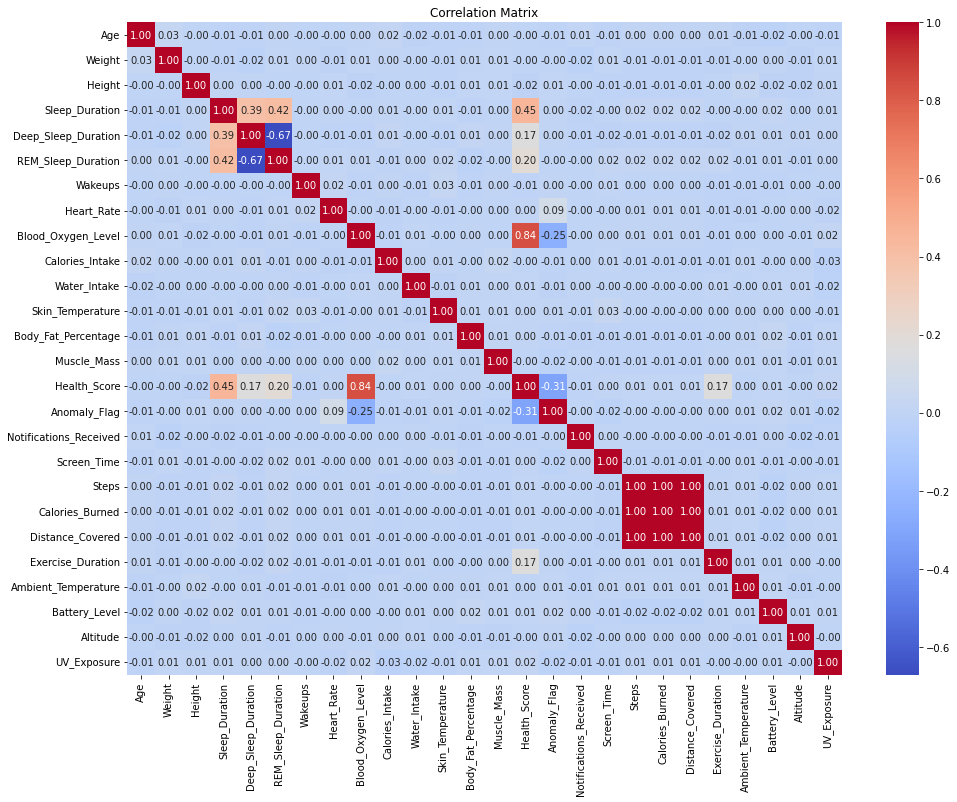

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()